**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.6.0'

**Performing data pre-processing**

**Check for null and duplicate values**

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/bmounikareddy98/Machine-learning-assignments/main/Assignment_2/Churn_Modelling.csv')
dataset.head() # Understanding the data

print("The number of null values for each feature is:", dataset.isnull().sum())
print("The number of duplicate records in the dataset are :" ,dataset.duplicated().sum())





The number of null values for each feature is: RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
The number of duplicate records in the dataset are : 0


In [3]:
X= dataset.iloc[:,3:-1].values # The first three columns rownumber, customerid and surname are not relevant to predict if the customer leaves a bank
Y= dataset.iloc[:,-1].values #Dependent variable


In [4]:
print(X) # The independent features array

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(Y) # The dependent feature(leave or stay in the bank)

[1 0 1 ... 1 1 0]


**Encoding categorical data**

**Performing LabelEncoding on Gender column because the order matters**

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2]) # Label encoding the gender column
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**Performing OneHotEncoding on Geography column because the order doesn't matter**

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Splitting dataset training data and test data**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Feature scaling to normalize the data**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Building the ANN**

In [10]:
ann= tf.keras.models.Sequential()

**Adding the input layer and first hidden layer**

In [12]:
ann.add(tf.keras.layers.Dense(units=10, activation='tanh')) # choosing the number of neurons in hidden layer as 10 and activation function as tanh in first hidden layer


**Adding the second hidden layer**

In [13]:
ann.add(tf.keras.layers.Dense(units=10, activation='tanh')) # choosing the number of neurons in hidden layer as 10 and activation function as tanh in second hidden layer

**Adding the output layer**

In [14]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # choosing the number of neurons in output layer as 1 as it is yes or no and activation function as sigmoid in output layer

**Compiling the Neural network**

In [15]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # as the output is either yes or no, used binary_crossentropy function

**Training the ANN on the training dataset**


In [16]:
ann.fit(X_train, Y_train, batch_size = 32, epochs = 150) # used the batch_size as 32 and epochs as 150


Epoch 1/150
250/250 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7515
Epoch 2/150
250/250 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8084
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8161
Epoch 4/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8248
Epoch 5/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8386
Epoch 6/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.8475
Epoch 7/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8535
Epoch 8/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8564
Epoch 9/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8579
Epoch 10/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3445 - accura

**Prediction of results on training and test sets by neural network designed**

In [17]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))
y_pred_train=ann.predict(X_train)
y_pred_train= (y_pred_train>0.5)
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), Y_train.reshape(len(Y_train),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


**Accuracy of the model**

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
cm_1 = confusion_matrix(Y_test, y_pred)
#print(cm)
accuracy_train= accuracy_score(Y_train, y_pred_train)
accuracy_test= accuracy_score(Y_test, y_pred)
print(accuracy_train)
print(accuracy_test) # The accuracy is 86.45%
#print(cm_1)



0.874875
0.859


**Root mean squared error on training and testing datasets**

In [20]:
import sklearn.metrics
import math
from sklearn.metrics import r2_score
# Finding rmse and r2 for training data
mse = sklearn.metrics.mean_squared_error(Y_train, y_pred_train)
rmse = math.sqrt(mse)
r2t = r2_score(Y_train, y_pred_train)
print(rmse)
print(r2t)

# Finding rmse and r2 for test data
mse_test = sklearn.metrics.mean_squared_error(Y_test, y_pred)
rmse_test = math.sqrt(mse_test)
r2t_test = r2_score(Y_test, y_pred)
print(rmse_test)
print(r2t_test)

0.35373012311647983
0.2294499458074688
0.37549966711037175
0.1269011958667131


**Plot between model accuracy and number of epochs when activation function is tanh and number of neurons is 6 for training data**

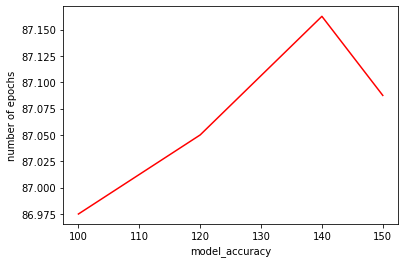

In [21]:
#Activation fucntion : tanh
number_of_epochs_tanh=[100,120,140,150] # number of neurons=6
model_Accuracy_training_tanh=[86.975, 87.05,87.1625,87.0875]

plt.xlabel('model_accuracy')
plt.ylabel('number of epochs')


plt.plot(number_of_epochs_tanh,model_Accuracy_training_tanh, color= 'red', scalex='true')


**Plot between model accuracy and number of epochs when activation function is tanh and number of neurons is 6 for testing data**

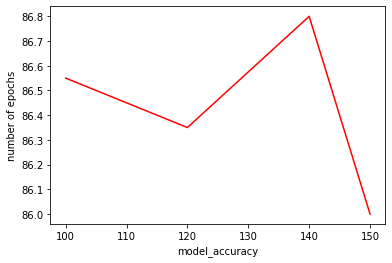

In [22]:
#Activation fucntion : tanh
number_of_epochs_tanh=[100,120,140,150] # number of neurons=6

model_Accuracy_testing_tanh= [86.55, 86.35, 86.8, 86]
plt.xlabel('model_accuracy')
plt.ylabel('number of epochs')


plt.plot(number_of_epochs_tanh,model_Accuracy_testing_tanh, color= 'red', scalex='true')


**Plot between model accuracy and number of epochs when activation function is tanh and number of neurons is 10 for training dataset**

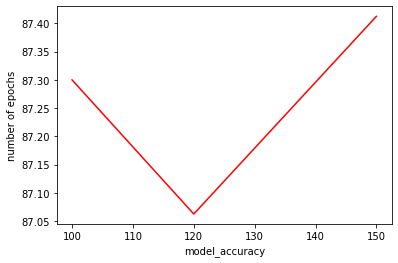

In [23]:
#Activation fucntion : tanh
number_of_epochs_tanh=[100,120,150] # number of neurons=10
model_Accuracy_training_tanh=[87.3, 87.0625,87.4125]

plt.xlabel('model_accuracy')
plt.ylabel('number of epochs')


plt.plot(number_of_epochs_tanh,model_Accuracy_training_tanh, color= 'red', scalex='true')


**Plot between model accuracy and number of epochs when activation function is tanh and number of neurons is 10 for testing dataset**

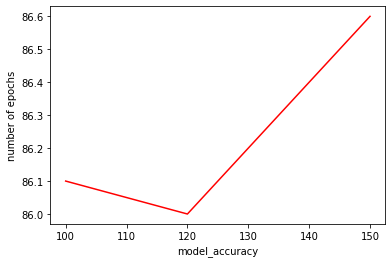

In [24]:
#Activation fucntion : tanh
number_of_epochs_tanh=[100,120,150] # number of neurons=10

model_Accuracy_testing_tanh= [86.1, 86, 86.6]
plt.xlabel('model_accuracy')
plt.ylabel('number of epochs')


plt.plot(number_of_epochs_tanh,model_Accuracy_testing_tanh, color= 'red', scalex='true')


**Plot between model accuracy and number of epochs when activation function is relu and number of neurons is 6 for testing dataset**

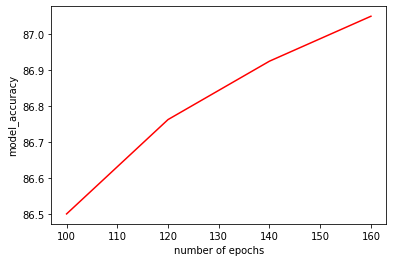

In [25]:
#Activation fucntion : relu
number_of_epochs_relu=[100,120,140,160] # number of neurons=6


model_Accuracy_training_relu=[86.5, 86.7625, 86.925, 87.05]

plt.ylabel('model_accuracy')
plt.xlabel('number of epochs')


plt.plot(number_of_epochs_relu,model_Accuracy_training_relu, color= 'red', scalex='true')


**Plot between model accuracy and number of epochs when activation function is relu and number of neurons is 6 for training dataset**

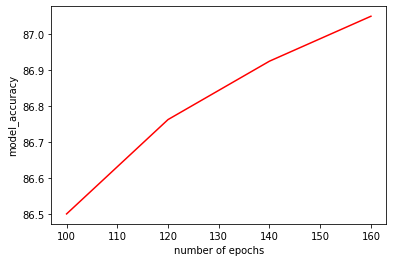

In [26]:
#Activation fucntion : relu
number_of_epochs_relu=[100,120,140,160] # number of neurons=6



model_Accuracy_testing_relu= [86.41, 86.1, 86.25, 86.6]
plt.ylabel('model_accuracy')
plt.xlabel('number of epochs')


plt.plot(number_of_epochs_relu,model_Accuracy_training_relu, color= 'red', scalex='true')

**Plot between model accuracy and number of epochs when activation function is relu and number of neurons is 10 for training dataset**

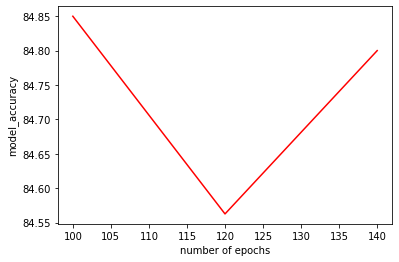

In [27]:
#Activation fucntion : relu
number_of_epochs_relu=[100,120,140] # number of neurons=10



model_Accuracy_training_relu= [84.85, 84.5625, 84.8]


plt.ylabel('model_accuracy')
plt.xlabel('number of epochs')


plt.plot(number_of_epochs_relu,model_Accuracy_training_relu, color= 'red', scalex='true')

**Plot between model accuracy and number of epochs when activation function is relu and number of neurons is 10 for testing dataset**

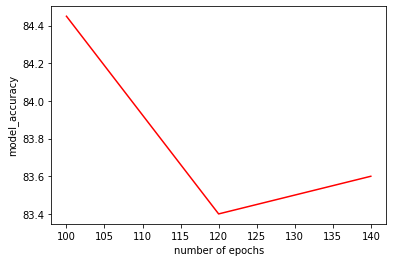

In [28]:
#Activation fucntion : relu
number_of_epochs_relu=[100,120,140] # number of neurons=10



model_Accuracy_testing_relu= [84.45, 83.4, 83.6]

plt.ylabel('model_accuracy')
plt.xlabel('number of epochs')


plt.plot(number_of_epochs_relu,model_Accuracy_testing_relu, color= 'red', scalex='true')